# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.11 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

Here the Dueling network is used for the local and target networks along with a non-prioritized replay buffer.

In [6]:
# Initialize the agent
from ddqn_agent import DDQNAgent
agent = DDQNAgent(
    state_size=state_size,     # State vector
    action_size=action_size,   # Number of actions
    seed=256,                  # See for random number generator
    hidden_layers=[32, 16, 8], # 2 fully connected layers + 4 per head
    tau=1e-3,                  # The fractional update contribution of the local network to target network.
    learning_rate=5e-4,        # learning rate
    head_name="DuelingDQN",    # Specify DuelingDQN with this
    head_scale="max"           # Use max advantage value to rescale the advantage function of the duelingDQN.
)

In [7]:
from experiments import Discrete_Action_Experiments

In [8]:
# DEFINE THE TARGET AS ACHIEVING A SPECIFIC RUNNING AVERAGE SCORE, AVERAGED OVER A GIVEN NUMBER OF EPISODES
# Set the number of episodes to get running average over
nepisodes_running_avg = 100

# Set the target score that must be achieved for a 'successful' agent
objective_score = 13.0, #13.0

In [9]:
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]

In [10]:
current_experiment = Discrete_Action_Experiments(
    nruns = 10,                                 # Number of runs for which the target objective score will be achieved
    nepisodes = 2000,                           # Number of episodes per run
    maxt = 1000,                                # Maximum number of steps per episode
    start_eps = 1.0,                            # Initial exploration probability
    end_eps = 0.01,                             # Smallest exploration probability
    decay_eps = 0.995,                          # Decay
    current_agent = agent,                      # Agent to be used
    current_env = env,                          # Environment to run the experiment in
    target_score = objective_score,             # Target score to be achieved during each repetition of the experiment
    num_episodes_score_avg = nepisodes_running_avg # Number of episodes over which the running average score will be calculated
)

In [11]:
# Run the experiment and collect score information
all_scores, all_avg_scores = current_experiment.run_experiment()



Run 0 	Episode_Num 0 	Average Score: -1.00
Run 0 	Episode_Num 100 	Average Score: 0.76
Run 0 	Episode_Num 200 	Average Score: 3.07
Run 0 	Episode_Num 300 	Average Score: 6.47
Run 0 	Episode_Num 400 	Average Score: 8.90
Run 0 	Episode_Num 500 	Average Score: 12.04

Environment solved in 528 episodes!	Average Score: 13.03 	Total time/seconds: 854.50


Run 1 	Episode_Num 0 	Average Score: 1.00
Run 1 	Episode_Num 100 	Average Score: 1.85
Run 1 	Episode_Num 200 	Average Score: 6.65
Run 1 	Episode_Num 300 	Average Score: 8.83
Run 1 	Episode_Num 400 	Average Score: 10.91
Run 1 	Episode_Num 500 	Average Score: 12.36

Environment solved in 534 episodes!	Average Score: 13.15 	Total time/seconds: 867.63


Run 2 	Episode_Num 0 	Average Score: 0.00
Run 2 	Episode_Num 100 	Average Score: 1.80
Run 2 	Episode_Num 200 	Average Score: 6.52
Run 2 	Episode_Num 300 	Average Score: 10.20
Run 2 	Episode_Num 400 	Average Score: 12.08

Environment solved in 472 episodes!	Average Score: 13.01 	Total time/seco

### Display the results

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [28]:
# Display the results in the notebook and save figure
def display_results(all_scores):        
    # Find the number of rows
    nrows = int(np.ceil(len(all_scores)/2))
    ncols = 2
        
    # Display the scores per episode along with the running averarage over 100 episodes and target score
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=[16, 20])
    #fig.suptitle("Target, per episode and running average scores for each experiment", fontsize=20)
    if len(all_scores)%2!=0:
        fig.delaxes(ax[nrows-1,ncols-1])
    plt.rcParams.update({'font.size': 14})
        
    count = 0
        
    # For each run
    for idx in range(len(all_scores)):
        # Get the list of scores for each episode in this run
        scores = all_scores[idx]
            
        # Get the rolling average over self.num_episodes_score_avg successive values of score
        scores_rolling = pd.Series(scores).rolling(nepisodes_running_avg).mean()
        
        #rowid = int(np.ceil(idx/2))
        rowid = idx//2
        colid = idx%2
        #print(idx, rowid, colid)

        # Style for score
        ax[rowid,colid].plot(scores, "-", c="blue", alpha=0.25)
        
        titlestr = 'Run ' + str(idx+1)
        ax[rowid, colid].set_title(titlestr)

        # Stype for rolling average of score
        ax[rowid,colid].plot(scores_rolling, "-", c="green", linewidth=5, alpha=0.25)

        # Display target score
        ax[rowid,colid].axhline(objective_score, c="red", linewidth=5, alpha=0.25)

        # Set labels
        ax[rowid,colid].set_xlabel("Episode")
        ax[rowid,colid].set_ylabel("Score")

        # Display grid
        ax[rowid,colid].grid(which="major")
        ax[rowid,colid].legend(["Score of Each Episode", "Moving Average over Episodes", "Target"])

    # Save figure
    fig.tight_layout()
    fig.savefig("result_score.jpg")

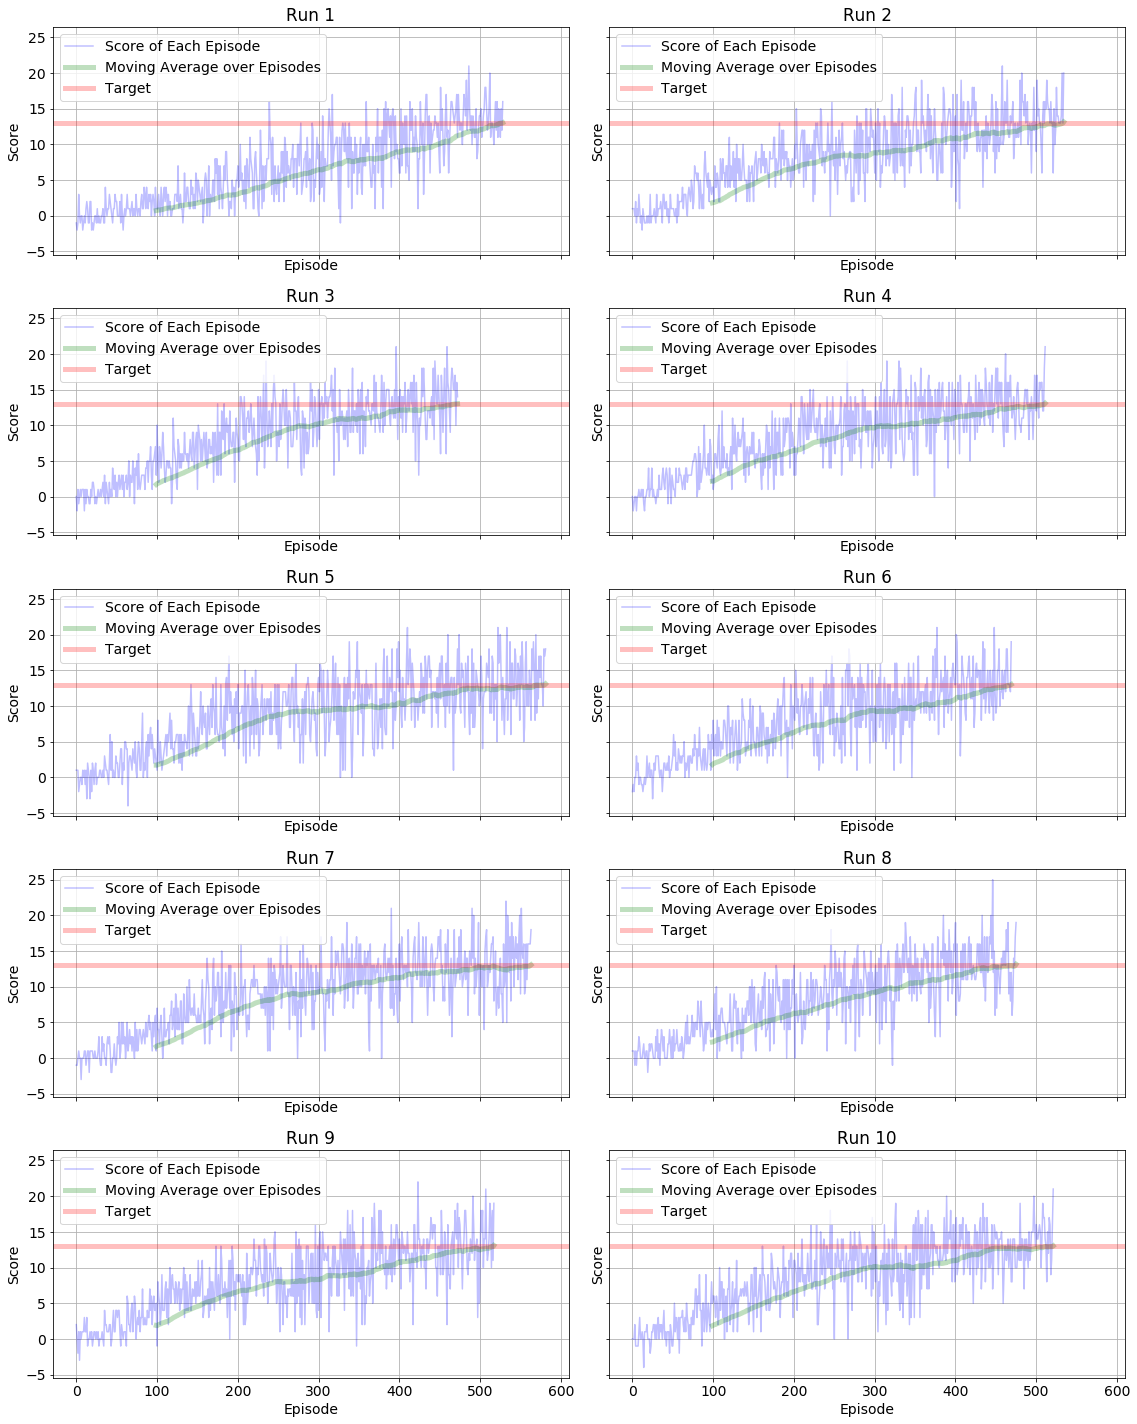

In [29]:
display_results(all_scores)

### Watch the agents performance

In [18]:
# Identify the run with the largest score and load weights from the appropriate checkpoint file
#print(all_avg_scores)
import torch
chkpt_filename = 'checkpoint_'+str(np.argmax(all_avg_scores))+'.pth'
print(chkpt_filename)

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(chkpt_filename))

checkpoint_1.pth


In [ ]:
# For 5 episodes
for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]   # get the next state
    print(i)
    
    for j in range(200):
        action = agent.act(state).astype(int)
        env_info = env.step(action)[brain_name]
        state = env_info.vector_observations[0]   # get the next state
        done = env_info.local_done[0]                  # see if episode has finished
        if done:
            break

When finished, you can close the environment.

In [31]:
env.close()